In [1]:
%pylab inline
import pandas as pd
import sqlite3
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
con = sqlite3.connect('./../data/weather_2012.sqlite')

In [3]:
c = con.cursor()

In [4]:
c.execute('SELECT * FROM sqlite_master;')

In [5]:
c.fetchall()

[(u'table',
  u'weather_2012',
  u'weather_2012',
  2,
  u'CREATE TABLE weather_2012 (\n            id INTEGER PRIMARY KEY AUTOINCREMENT,\n            date_time TIMESTAMP,\n            temp DOUBLE PRECISION\n        )'),
 (u'table',
  u'sqlite_sequence',
  u'sqlite_sequence',
  3,
  u'CREATE TABLE sqlite_sequence(name,seq)')]

In [6]:
c.execute('SELECT * FROM sqlite_sequence').fetchall()

[(u'weather_2012', 100)]

In [7]:
c.execute('SELECT * FROM weather_2012').fetchall()

[(1, u'2012-01-01 00:00:00', -1.8),
 (2, u'2012-01-01 01:00:00', -1.8),
 (3, u'2012-01-01 02:00:00', -1.8),
 (4, u'2012-01-01 03:00:00', -1.5),
 (5, u'2012-01-01 04:00:00', -1.5),
 (6, u'2012-01-01 05:00:00', -1.4),
 (7, u'2012-01-01 06:00:00', -1.5),
 (8, u'2012-01-01 07:00:00', -1.4),
 (9, u'2012-01-01 08:00:00', -1.4),
 (10, u'2012-01-01 09:00:00', -1.3),
 (11, u'2012-01-01 10:00:00', -1.0),
 (12, u'2012-01-01 11:00:00', -0.5),
 (13, u'2012-01-01 12:00:00', -0.2),
 (14, u'2012-01-01 13:00:00', 0.2),
 (15, u'2012-01-01 14:00:00', 0.8),
 (16, u'2012-01-01 15:00:00', 1.8),
 (17, u'2012-01-01 16:00:00', 2.6),
 (18, u'2012-01-01 17:00:00', 3.0),
 (19, u'2012-01-01 18:00:00', 3.8),
 (20, u'2012-01-01 19:00:00', 3.1),
 (21, u'2012-01-01 20:00:00', 3.2),
 (22, u'2012-01-01 21:00:00', 4.0),
 (23, u'2012-01-01 22:00:00', 4.4),
 (24, u'2012-01-01 23:00:00', 5.3),
 (25, u'2012-01-02 00:00:00', 5.2),
 (26, u'2012-01-02 01:00:00', 4.6),
 (27, u'2012-01-02 02:00:00', 3.9),
 (28, u'2012-01-02 03:00

In [8]:
table = pd.read_sql_query("SELECT * from weather_2012",con,
                         index_col='id',
                         parse_dates='date_time')

In [29]:
month=table.set_index('date_time').index.month

In [36]:
table['day']=pd.DatetimeIndex(table['date_time']).day

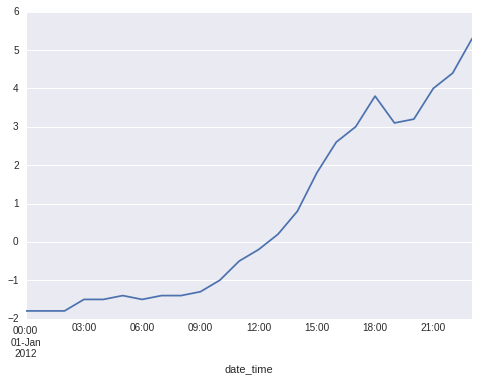

In [43]:
table.query('day==1').set_index('date_time')['temp'].plot()

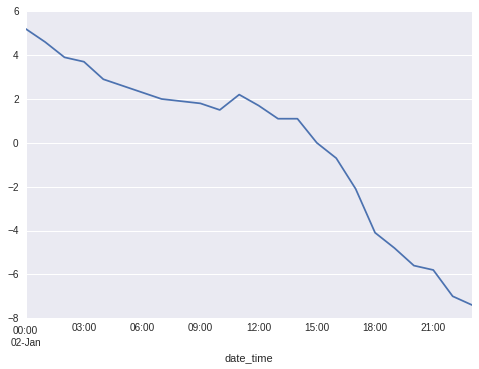

In [44]:
table.query('day==2').set_index('date_time')['temp'].plot()

In [45]:
table.query('day==2').set_index('date_time')['temp']

date_time
2012-01-02 00:00:00    5.2
2012-01-02 01:00:00    4.6
2012-01-02 02:00:00    3.9
2012-01-02 03:00:00    3.7
2012-01-02 04:00:00    2.9
2012-01-02 05:00:00    2.6
2012-01-02 06:00:00    2.3
2012-01-02 07:00:00    2.0
2012-01-02 08:00:00    1.9
2012-01-02 09:00:00    1.8
2012-01-02 10:00:00    1.5
2012-01-02 11:00:00    2.2
2012-01-02 12:00:00    1.7
2012-01-02 13:00:00    1.1
2012-01-02 14:00:00    1.1
2012-01-02 15:00:00    0.0
2012-01-02 16:00:00   -0.7
2012-01-02 17:00:00   -2.1
2012-01-02 18:00:00   -4.1
2012-01-02 19:00:00   -4.8
2012-01-02 20:00:00   -5.6
2012-01-02 21:00:00   -5.8
2012-01-02 22:00:00   -7.0
2012-01-02 23:00:00   -7.4
Name: temp, dtype: float64